<center><h1>Predict Growth Curve Model for Glioma cancer</h1></center>


#### This Jupyter Notebook aims to predict when glioma cells will generate a tumor about 300 mm^3 in size after subcutaneous injection. For this particular case, 5 million U251 cells were injected (50 μL of PBS) on the left shoulder of NCI Athymic Ncr-nu/nu mice approximately two months old.

#### The data was obtained from a tumor growth experiment dataset. All animal experiments were performed according to the Guidelines for Care and Use of Animals established by the Division of Comparative Medicine and the Animal Studies Committee at Washington University in St. Louis.

In [1]:
# The first step is to import all packages needed for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from numpy import reshape

In [2]:
# The second step is to import the data saved in an excel spreadsheet
df_U251 = pd.read_csv('/Users/cristianvillasboas/Desktop/U251_50uL.csv') # create a object for your dataframe. Next, use the function pd.read_csv to import the data from the excel spreadsheet (remember to add the path).

# Print the first 5 rows of the DataFrame (df)
print(df_U251)

# Add a space between the data frame and the next command to check for column names
print()

# Print the column names
print(df_U251.columns)

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    50.40    39.38    35.50    32.32    16.46
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24   744.67   480.20   472.38   383.82   313.60
5                    28  1211.48   555.13   609.75   529.83   334.61

Index(['days_after_injection', 'tumor_1', 'tumor_2', 'tumor_3', 'tumor_4',
       'tumor_5'],
      dtype='object')


In [3]:
# Use the 'px. scatter' command to plot the data and visualize the tumor growth individually. This command is specifically designed for this purpose.
fig = px.scatter(df_U251, x='days_after_injection', y=df_U251.columns[1:], # x_axis will be 'days_after_injection' and y_axis will be the remaining dataframe columns using the comand df_U251.columns[1:] where 1: is to exclude the first column.
                 labels={'variable': 'Tumor', 'days_after_injection':'Days after injection', 'value':'Tumor Size (mm^3)'}, # to change the labels of the x-axis, y-axis and the legend and the title
                  title='U251 injection - 5 Million cells')
fig.update_traces(mode = 'markers + lines')
fig.update_layout(title_x=0.5) # to centralize the graphic title

# Set specific ticks for the x-axis
fig.update_xaxes(
    tickvals= [10, 12, 17, 20, 24, 28],
    ticktext= [10, 12, 17, 20, 24, 28]
)

fig.show()

##### Ok, it's possible to observe that tumor_1 (the same as mouse 1) has a growth rate more aggresive than the other four. That point out the fact this tumor in speficic could be an outlier.

In [4]:
# First step, we create a new df to copy the current one, so we don't alter it
df_U251_mean_and_std = df_U251.copy()

# Add a new column 'mean' with the mean of each row (excluding column 0)
df_U251_mean_and_std['mean'] = df_U251_mean_and_std.iloc[:, 1:].mean(axis=1) # iloc [:, 1:] means ':' all rows will be selected, excluding the first column. Mean(axis=1) indicates that the calculation must be done in the horizontal direction (rows).

# Add a new column 'std' with the standard deviation of each row (excluding column 0 and 'mean' column)
df_U251_mean_and_std['std'] = df_U251_mean_and_std.iloc[:, 1:-1].std(axis=1) # iloc [:, 1:-1] means ':' to select all rows, the comma indicates i have another step in the selection. Then '1:-1' means to include in the calculations columns number 1 to last one, exluding column 0 (days after injection) and 'mean' column. Mean(axis=1) indicates that the calculation must be done in the horizontal direction (rows).

# Print the new DataFrame
print(df_U251_mean_and_std)
print() # Print a blank line
print(df_U251) # Print the original DataFrame and check if the changes are done only to the new_df

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5     mean  \
0                    10    50.40    39.38    35.50    32.32    16.46   34.812   
1                    12    82.34    56.24    69.16    29.97    32.22   53.986   
2                    17   243.80   168.57   239.31   132.60   116.17  180.090   
3                    20   425.60   305.81   284.59   112.50   148.84  255.468   
4                    24   744.67   480.20   472.38   383.82   313.60  478.934   
5                    28  1211.48   555.13   609.75   529.83   334.61  648.160   

          std  
0   12.322050  
1   22.857204  
2   59.244724  
3  126.626108  
4  163.586509  
5  331.577639  

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    50.40    39.38    35.50    32.32    16.46
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81  

##### Now we plot a graphic with the standard deviation and we check the difference we get

In [5]:
fig = go.Figure() # for this figure, we will use the go.Figure() function to create the shade region for average
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.iloc[:, 1:].mean(axis=1),
    mode='lines',
    name='Mean',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
))
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.iloc[:, 1:].mean(axis=1) + df_U251.iloc[:, 1:].std(axis=1),
    mode='lines',
    name='Mean + Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the upper bound
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.iloc[:, 1:].mean(axis=1) - df_U251.iloc[:, 1:].std(axis=1),
    mode='lines',
    name='Mean - Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the lower bound
fig.update_layout(
    title='U251 Tumor Growth',
    xaxis_title='Days Afer Injection',
    yaxis_title='Tumor Size (mm^3)',
    title_x = 0.5,
    yaxis_range=[0, 1000] # this set the y-axis range to 0 to 1000
)
fig.update_xaxes(
    tickvals=[10, 12, 17, 20, 24, 28],
    ticktext=[10, 12, 17, 20, 24, 28]
)
fig.show()

##### Next step is to check for outliers. A good tool to check for outlier is using quantile function

In [6]:

# Create a copy of df_U251, so any changes won't affect the original df
df_U251_outlier = df_U251.copy()

# Create a function to detect and remove outliers using the IQR method
def remove_outliers(data_outlier, col):
    # Select the columns of interest, excluding the first column
    tumor_cols = [f'tumor_{i+1}' for i in range(5)] # I've added a line tumor_cols = [f'tumor_{i+1}' for i in range(5)] to create a list of tumor column names. This makes the code more readable and easier to modify if the number of tumor columns changes.
    data_subset = data_outlier[[col] + tumor_cols] # In the line data_subset = data_outlier[[col] + tumor_cols], I'm creating the data_subset DataFrame by selecting the col column and all the tumor columns.

    q1 = data_subset.iloc[:, 1:].quantile(0.25, axis=1) # Iloc is used here, so we don't take into consideration the first column "days_after_injection".
    q3 = data_subset.iloc[:, 1:].quantile(0.75, axis=1)
    iqr = q3 - q1

    # Broadcast the scalar values to have the same length as the number of rows
    lower_bound = q1.values.reshape(-1, 1) - (1.5 * iqr.values.reshape(-1, 1))
    upper_bound = q3.values.reshape(-1, 1) + (1.5 * iqr.values.reshape(-1, 1))

    # Repeat the lower_bound and upper_bound arrays to match the number of columns
    lower_bound = np.repeat(lower_bound, data_subset.shape[1] - 1, axis=1)
    upper_bound = np.repeat(upper_bound, data_subset.shape[1] - 1, axis=1)

    # Update the original DataFrame with outliers replaced by NaN
    data_outlier.loc[:, tumor_cols] = np.where(
        np.logical_and(data_subset.iloc[:, 1:].values >= lower_bound, data_subset.iloc[:, 1:].values <= upper_bound),
        data_subset.iloc[:, 1:].values,
        np.nan
    ) # In the line data_outlier.loc[:, tumor_cols] = np.where(...), I'm using loc instead of iloc to update the tumor columns in the original DataFrame data_outlier.

    return data_outlier

# Apply the function to the data
for col in [f'tumor_{i+1}' for i in range(5)]:
    df_U251_outlier = remove_outliers(df_U251_outlier, col)

# Print the updated DataFrame with outliers removed
print(df_U251_outlier)
print() # To create a space between the two DataFrames
print(df_U251)

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10      NaN    39.38    35.50    32.32      NaN
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24      NaN   480.20   472.38   383.82   313.60
5                    28      NaN   555.13   609.75   529.83      NaN

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    50.40    39.38    35.50    32.32    16.46
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24   744.67   480.20   472.38   383.82   313.60
5                    28  1211.48   555.13   609.75   529.83   334.61


So, some outliers were identified here. From now on, we have two options: Option number one, the growth rate of tumor_1 is not the same as compared with the other four tumors. So, we could exclude tumor_1, which has three outliers. Or we could exclude only the outliers and replace the NaN entries with averages for each row. We will do both in this notebook. By the end of this work, we will also check the impact of not removing outliers from the data.


## Excluding Tumor_1

Considering tumor_1 as an outlier in our code, we will remove the animal from the from the dataframe and check for new outliers.

In [7]:
# First we create a copy of the df_U251
df_U251_tumor2_5 = df_U251.copy()

# In order to remove the tumor_1 we need to use the function drop
df_U251_tumor2_5 = df_U251_tumor2_5.drop(['tumor_1'], axis=1)
print(df_U251_tumor2_5)

print() # print empty line
# also print the df_U251 to check if any changes where applied
print(df_U251)

   days_after_injection  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    39.38    35.50    32.32    16.46
1                    12    56.24    69.16    29.97    32.22
2                    17   168.57   239.31   132.60   116.17
3                    20   305.81   284.59   112.50   148.84
4                    24   480.20   472.38   383.82   313.60
5                    28   555.13   609.75   529.83   334.61

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    50.40    39.38    35.50    32.32    16.46
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24   744.67   480.20   472.38   383.82   313.60
5                    28  1211.48   555.13   609.75   529.83   334.61


In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_U251_tumor2_5['days_after_injection'],
    y=df_U251_tumor2_5.iloc[:, 1:].mean(axis=1),
    mode='lines',
    name='Mean',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
))
fig.add_trace(go.Scatter(
    x=df_U251_tumor2_5['days_after_injection'],
    y=df_U251_tumor2_5.iloc[:, 1:].mean(axis=1) + df_U251_tumor2_5.iloc[:, 1:].std(axis=1),
    mode='lines',
    name='Mean + Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the upper bound
fig.add_trace(go.Scatter(
    x=df_U251_tumor2_5['days_after_injection'],
    y=df_U251_tumor2_5.iloc[:, 1:].mean(axis=1) - df_U251_tumor2_5.iloc[:, 1:].std(axis=1),
    mode='lines',
    name='Mean - Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the lower bound
fig.update_layout(
    title='U251 Tumor Growth for 50uL Injection',
    xaxis_title='Days Afer Injection',
    title_x = 0.5, # to centralize the title
    yaxis_title='Tumor Size (mm^3)',
    yaxis_range=[0, 1000] # this set the y-axis range to 0 to 1000
)
fig.update_xaxes(
    tickvals=[10, 12, 17, 20, 24, 28],
    ticktext=[10, 12, 17, 20, 24, 28]
)
fig.show()

print(df_U251_tumor2_5.mean(axis=1))

0     26.732
1     39.918
2    134.730
3    174.348
4    334.800
5    411.464
dtype: float64


#### Now let's check for outliers in this cleaned dataset

In [9]:
# Create a copy of df_U251_tumor2_5 to df_U251_tumor_2_5_outlier_removed
df_U251_tumor_2_5_outlier_removed = df_U251_tumor2_5.copy()

# Create a function to detect and remove outliers using the IQR method
def remove_outliers1(data_outlier1, col):
    # Select the columns of interest, excluding the first column
    tumor_cols1 = [f'tumor_{i}' for i in range(2, 6)] # Start from range of 2 because tumor_1 doesn't exist in this df
    data_subset1 = data_outlier1[[col] + tumor_cols1] # In the line data_subset = data_outlier[[col] + tumor_cols], I'm creating the data_subset DataFrame by selecting the col column and all the tumor columns.

    q1 = data_subset1.iloc[:, 1:].quantile(0.25, axis=1) # Iloc is used here, so we don't take into consideration the first column "days_after_injection".
    q3 = data_subset1.iloc[:, 1:].quantile(0.75, axis=1)
    iqr = q3 - q1

    # Broadcast the scalar values to have the same length as the number of rows
    lower_bound1 = q1.values.reshape(-1, 1) - (1.5 * iqr.values.reshape(-1, 1))
    upper_bound1 = q3.values.reshape(-1, 1) + (1.5 * iqr.values.reshape(-1, 1))

    # Repeat the lower_bound and upper_bound arrays to match the number of columns
    lower_bound1 = np.repeat(lower_bound1, data_subset1.shape[1] - 1, axis=1)
    upper_bound1 = np.repeat(upper_bound1, data_subset1.shape[1] - 1, axis=1)

    # Update the original DataFrame with outliers replaced by NaN
    data_outlier1.loc[:, tumor_cols1] = np.where(
        np.logical_and(data_subset1.iloc[:, 1:].values >= lower_bound1, data_subset1.iloc[:, 1:].values <= upper_bound1),
        data_subset1.iloc[:, 1:].values,
        np.nan
    ) # In the line data_outlier.loc[:, tumor_cols] = np.where(...), I'm using loc instead of iloc to update the tumor columns in the original DataFrame data_outlier.

    return data_outlier1

# Apply the function to the data
for col in ['days_after_injection']: # Assuming 'days_after_injection' is the column you want to iterate over
    df_U251_tumor_2_5_outlier_removed = remove_outliers1(df_U251_tumor_2_5_outlier_removed, col)

# Print the updated DataFrame with outliers removed
print(df_U251_tumor_2_5_outlier_removed)

   days_after_injection  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    39.38    35.50    32.32    16.46
1                    12    56.24    69.16    29.97    32.22
2                    17   168.57   239.31   132.60   116.17
3                    20   305.81   284.59   112.50   148.84
4                    24   480.20   472.38   383.82   313.60
5                    28   555.13   609.75   529.83      NaN


So, it identifies one outlier in tumor_5. Let's replace the NaN entry with mean of each row, excluding first column (days_after_injection)

In [10]:
# Calculate the mean of the non-missing values in each row, excluding the first column
mean_outlier_tumor2_5 = df_U251_tumor_2_5_outlier_removed.iloc[:, 1:].mean(axis=1)

# Reset the index of the mean_outlier_tumor2_5 series
mean_outlier_tumor2_5 = mean_outlier_tumor2_5.reset_index(drop=True)

# Replace the NaN values in the last column with the mean of the non-missing values in each row, rounded to two decimal places
df_U251_tumor_2_5_outlier_removed.iloc[:, -1] = df_U251_tumor_2_5_outlier_removed.iloc[:, -1].fillna(mean_outlier_tumor2_5).round(2)

print(df_U251_tumor_2_5_outlier_removed)

   days_after_injection  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    39.38    35.50    32.32    16.46
1                    12    56.24    69.16    29.97    32.22
2                    17   168.57   239.31   132.60   116.17
3                    20   305.81   284.59   112.50   148.84
4                    24   480.20   472.38   383.82   313.60
5                    28   555.13   609.75   529.83   564.90


In [11]:
# Now, we need to create the X and y for the linear regression model. Since there are more than one tumor, each tumor will be assigned to a different y
X = df_U251_tumor_2_5_outlier_removed['days_after_injection'].values.reshape(-1, 1) # create the X array
y2= np.array(df_U251_tumor_2_5_outlier_removed['tumor_2'])
y3= np.array(df_U251_tumor_2_5_outlier_removed['tumor_3'])
y4= np.array(df_U251_tumor_2_5_outlier_removed['tumor_4'])
y5= np.array(df_U251_tumor_2_5_outlier_removed['tumor_5'])

Y = np.vstack([y2, y3, y4, y5]).T # stack the y arrays vertically into one single Y

model = LinearRegression().fit(X, Y) # create the linear regression model

predictions = model.predict(X) # predict the y values
y_pred = model.predict(X)
mse = mean_squared_error(Y,y_pred)
r2 = r2_score(Y, y_pred)
mrse = np.sqrt(mse)/np.mean(Y)

average_coef = np.mean([model.coef_]) # calculate the average coefficient of the linear regression equation. Omit [0][0] for gettin the right number
average_intercept = np.mean([model.intercept_]) # calculate the average intercept of the linear regression equation

#print(f'Linear regression equation: y = {model.intercept_[0].item():.2f} + {model.coef_[0][0].item():.2f} * x') # print the linear regression equation. This equation is for the first tumor. To have an equation taking into consideration all tumors, please use the average_intercept and average_coef variables
print(f'Linear Regression Equation: Y = {average_intercept:.2f} + X * {average_coef:.2f}') # print the linear regression equation. This equation considers all tumors tumor based on the averages of intercept and coefficient.
print() # To print a space between the two print statements
print('Please see the predictions below:')
print(predictions) # print the predicted y values

print() # To print a space between the two print statements
print('Please see the coefficients below:')
print(model.coef_) # print the coefficients of the linear regression equation
print() # to print a space between the two print statements
print('Please see the intercept below:')
print(model.intercept_) # print the intercept of the linear regression equation

print() # to print a space between the two print statements
print('Please see the MSE, R^2 and MRSE below:')
print(f'MSE: {mse:.2f}', '''The Mean Square Error (MSE) measures the average squared 
      difference between the actual and predicted values in the model.
      Lower MSE values indicate better model performance''') # print the mean squared error of the linear regression model
print(f'R^2: {r2:.2f}', '''The R-squared value measures the proportion of the variance 
      in the dependent variable that is predictable from the independent variable. 
      Higher R-squared vaules indicate better model performance''') # print the R-squared value of the linear regression model
print(f'MRSE: {mrse:.2f}', '''The Mean Relative Square Error (MRSE) is a variation 
      of MSE that accounts for the scale of the data by normalizing the squared error 
      using the mean of the actual values. It is useful when the scale of the target 
      variable varies widely across samples. 
      Like MSE, lower MSRE values indicate better model performance''') # print the mean root squared error of the linear regression model

Linear Regression Equation: Y = -312.87 + X * 29.82

Please see the predictions below:
[[  4.20033403  11.57665971 -32.31846903 -42.31890049]
 [ 66.16613779  75.93862213  23.16979819  14.39103688]
 [221.08064718 236.84352818 161.89046625 156.16588031]
 [314.02935282 333.38647182 245.12286708 241.23078636]
 [437.96096033 462.11039666 356.09940153 354.6506611 ]
 [561.89256785 590.8343215  467.07593598 468.07053584]]

Please see the coefficients below:
[[30.98290188]
 [32.18098121]
 [27.74413361]
 [28.35496868]]

Please see the intercept below:
[-305.62868476 -310.2331524  -309.75980515 -325.86858733]

Please see the MSE, R^2 and MRSE below:
MSE: 2575.29 The Mean Square Error (MSE) measures the average squared 
      difference between the actual and predicted values in the model.
      Lower MSE values indicate better model performance
R^2: 0.93 The R-squared value measures the proportion of the variance 
      in the dependent variable that is predictable from the independent variable. 

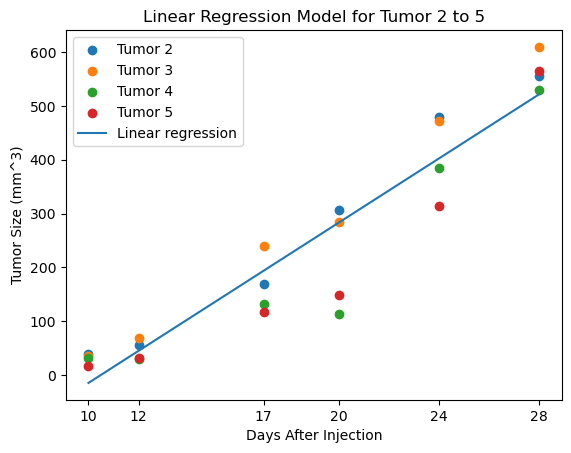

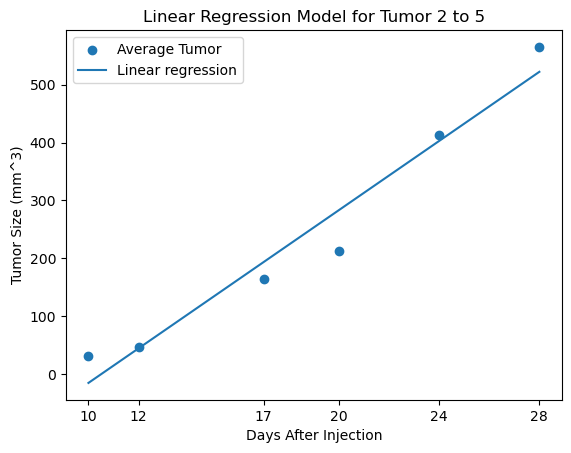

Linear Regression Equation: Y = -312.87 + 29.82*X
MSE: 2575.29
R^2: 0.93
MRSE: 0.21


In [12]:
# Plot the data obtained from the linear regression model with df from tumor_2 to tumor_5 "df_U251_tumor_2_5_outlier_removed"
# Plot each set of y-values separately
for i in range(Y.shape[1]):
    plt.scatter(X, Y[:, i], label=f'Tumor {i+2}')

# Plot the linear regression equation
x_values = np.linspace(X.min(), X.max(), 100)
y_values = average_intercept + average_coef * x_values
plt.plot(x_values, y_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for Tumor 2 to 5')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


# Calculate the mean of Y across all tumors
average_Y = np.mean(Y, axis=1)

# Plot the average of y-values
plt.scatter(X, average_Y, label='Average Tumor')

# Plot the linear regression equation
x_values = np.linspace(X.min(), X.max(), 100)
y_values = average_intercept + average_coef * x_values
plt.plot(x_values, y_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for Tumor 2 to 5')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


print(f'Linear Regression Equation: Y = {average_intercept:.2f} + {average_coef:.2f}*X')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MRSE: {mrse:.2f}')


In [13]:
# In this chunk of code, we will again use go.Figure() to create a figure and add the standard deviation. In addition the linear regression line will also be added to the figure.
# Create a figure
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_U251_tumor_2_5_outlier_removed['days_after_injection'],
    y=df_U251_tumor_2_5_outlier_removed.mean(axis=1),
    mode='lines',
    name='Mean',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
))
fig.add_trace(go.Scatter(
    x=df_U251_tumor_2_5_outlier_removed['days_after_injection'],
    y=df_U251_tumor_2_5_outlier_removed.mean(axis=1) + df_U251_tumor_2_5_outlier_removed.std(axis=1),
    mode='lines',
    name='Mean + Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # this will create a trace for the upper bound
fig.add_trace(go.Scatter(
    x=df_U251_tumor_2_5_outlier_removed['days_after_injection'],
    y=df_U251_tumor_2_5_outlier_removed.mean(axis=1) - df_U251_tumor_2_5_outlier_removed.std(axis=1),
    mode='lines',
    name='Mean - Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the lower bound

# Plot the linear regression equation
x_values = np.linspace(X.min(), X.max(), 100)
y_values = average_intercept + average_coef * x_values
fig.add_trace(go.Scatter(
    x=x_values,
    y=y_values,
    mode='lines',
    name='Linear regression equation'
))

fig.update_layout(
    title='U251 Tumor Growth',
    title_x = 0.5,
    xaxis_title='Days Afer Injection',
    yaxis_title='Tumor Size (mm^3)',
    yaxis_range=[0, 1000] # This set the y-axis range to 0 to 1000
)
fig.update_xaxes(
    tickvals=[10, 12, 17, 20, 24, 28],
    ticktext=[10, 12, 17, 20, 24, 28]
)
fig.show()

print(f'Linear Regression Equation: Y = {average_intercept:.2f} + {average_coef:.2f}*X')
print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MRSE: {mrse:.2f}')

Linear Regression Equation: Y = -312.87 + 29.82*X
R^2: 0.93
MSE: 2575.29
MRSE: 0.21


### Now, we calculate after how many days the tumor will reach 300 mm^3 from tumors 2 to 5, after removing outliers.

In [14]:
# the equation line is y = ax + b
# a is equal to the slope
# b is equal to the y-intercept
# y = 300 mm^3
# So, to calculate the equation line:
a = average_coef
print(f'The value of a is: {a:.2f}')

b = average_intercept
print(f'The value of b is: {b:.2f}')

y = 300

# So, replacing this values to the line equation:
x_grow = (300-b)/a
print(f'The tumors will reach 300 mm^3 in about: {x_grow:.0f}', 'days')

The value of a is: 29.82
The value of b is: -312.87
The tumors will reach 300 mm^3 in about: 21 days


##### Finally, let's see how the regression lines look for each animal with tumor.

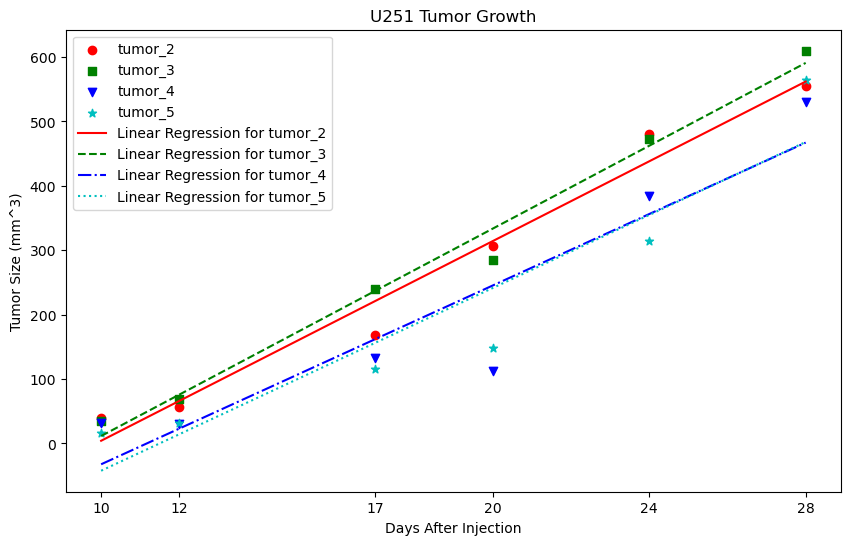

Linear regression equation: y2 = -305.63 + 30.98*X
Linear regression equation: y3 = -310.23 + 32.18*X
Linear regression equation: y4 = -309.76 + 27.74*X
Linear regression equation: y5 = -325.87 + 28.35*X


In [15]:
# Now, we need to create the X and y for the linear regression model. Since there are more than one tumor, each tumor will be assigned to a different y
X = df_U251_tumor_2_5_outlier_removed['days_after_injection']
y2= np.array(df_U251_tumor_2_5_outlier_removed['tumor_2'])
y3= np.array(df_U251_tumor_2_5_outlier_removed['tumor_3'])
y4= np.array(df_U251_tumor_2_5_outlier_removed['tumor_4'])
y5= np.array(df_U251_tumor_2_5_outlier_removed['tumor_5'])

model_y2 = LinearRegression() # create the linear regression model for tumor_2
model_y2.fit(X.values.reshape(-1, 1), y2) # fit the linear regression model for tumor_2

model_y3 = LinearRegression() # create the linear regression model for tumor_3
model_y3.fit(X.values.reshape(-1, 1), y3) # fit the linear regression model for tumor_3

model_y4 = LinearRegression() # create the linear regression model for tumor_4
model_y4.fit(X.values.reshape(-1, 1), y4) # fit the linear regression model for tumor_4

model_y5 = LinearRegression() # create the linear regression model for tumor_5
model_y5.fit(X.values.reshape(-1, 1), y5) # fit the linear regression model for tumor_5

predictions_y2 = model_y2.predict(X.values.reshape(-1, 1)) # predict the y2 values
predictions_y3 = model_y3.predict(X.values.reshape(-1, 1)) # predict the y3 values
predictions_y4 = model_y4.predict(X.values.reshape(-1, 1)) # predict the y4 values
predictions_y5 = model_y5.predict(X.values.reshape(-1, 1)) # predict the y5 values

# Finally, we plot the data points for each tumor, assigning a different color and marker
plt.figure(figsize=(10, 6))
plt.scatter(X, y2, color='r', label='tumor_2', marker='o')
plt.scatter(X, y3, color='g', label='tumor_3', marker='s')
plt.scatter(X, y4, color='b', label='tumor_4', marker='v')
plt.scatter(X, y5, color='c', label='tumor_5', marker='*')

# Here, we assign a different color and linestyle for each linear regression model derived from tumor_2 to tumor_5
plt.plot(X, predictions_y2, color='r', linestyle='-', label='Linear Regression for tumor_2')
plt.plot(X, predictions_y3, color='g', linestyle='--', label='Linear Regression for tumor_3')
plt.plot(X, predictions_y4, color='b', linestyle='-.', label='Linear Regression for tumor_4')
plt.plot(X, predictions_y5, color='c', linestyle=':', label='Linear Regression for tumor_5')

plt.xlabel('Days After Injection')
plt.ylabel('Tumor Size (mm^3)')
plt.title('U251 Tumor Growth')
plt.legend()
plt.xticks([10, 12, 17, 20, 24, 28])
plt.show()

print(f'Linear regression equation: y2 = {model_y2.intercept_:.2f} + {model_y2.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y3 = {model_y3.intercept_:.2f} + {model_y3.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y4 = {model_y4.intercept_:.2f} + {model_y4.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y5 = {model_y5.intercept_:.2f} + {model_y5.coef_[0]:.2f}*X') # print the linear regression equation

## Now we will only exclude the outliers, replace the NaN entries by the mean of each row and calculate the number of days to reach 300 mm^3

In [16]:
# Since we had checked for outliers before, we call our dataset
print(df_U251_outlier)

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10      NaN    39.38    35.50    32.32      NaN
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24      NaN   480.20   472.38   383.82   313.60
5                    28      NaN   555.13   609.75   529.83      NaN


##### Now we replace the NaN entries with average for each row

In [17]:
def replace_nan(df):
    # Calculate the row averages for columns 1 to 5, excluding the first-row
    row_avgs = df.iloc[1:, 1:6].mean(axis=1, skipna=True)

    # Replace NaN values with row averages, excluding the first row and column
    df.iloc[1:, 1:6] = df.iloc[1:, 1:6].apply(lambda x: x.fillna(x.mean()), axis=1)

    # Round the values to 2 decimal places
    df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(lambda x: x.apply(lambda y: round(y, 2) if not np.isnan(y) else y), axis=1)

    return df

df_outlier_replaced = replace_nan(df_U251_outlier)

# Replace the NaN values in the first row with the row averages
df_outlier_replaced.iloc[0, 1:6] = df_outlier_replaced.iloc[0, 1:6].fillna(df_outlier_replaced.iloc[1, 1:6].mean())

# Round the values in the first row to 2 decimal places
df_outlier_replaced.iloc[0, 1:6] = df_outlier_replaced.iloc[0, 1:6].apply(lambda x: round(x, 2) if not np.isnan(x) else x)

print(df_outlier_replaced)

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    53.99    39.38    35.50    32.32    53.99
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24   412.50   480.20   472.38   383.82   313.60
5                    28   564.90   555.13   609.75   529.83   564.90


##### Now we calculate the linear regression equation

In [18]:

# Assign for X as X1 and for y as y1_1. The _1 is to distinguish from the previous linear regression model from tumor_2 to tumor_5
X1 = df_outlier_replaced['days_after_injection'].values.reshape(-1, 1) # create the X array
y1_1= np.array(df_outlier_replaced['tumor_1'])
y2_1= np.array(df_outlier_replaced['tumor_2'])
y3_1= np.array(df_outlier_replaced['tumor_3'])
y4_1= np.array(df_outlier_replaced['tumor_4'])
y5_1= np.array(df_outlier_replaced['tumor_5'])

Y1 = np.vstack([y1_1, y2_1, y3_1, y4_1, y5_1]).T # Stack the y arrays vertically into one single Y1

model1 = LinearRegression().fit(X1, Y1) # create the linear regression model

predictions1 = model1.predict(X1) # predict the y values
y_pred1 = model1.predict(X1)
mse1 = mean_squared_error(Y1, y_pred1)
r2_1 = r2_score(Y1, y_pred1)
mrse1 = np.sqrt(mse1)/np.mean(Y1)

average_coef_1 = np.mean([model1.coef_]) # calculate the average coefficient of the linear regression equation. Omit [0][0] for gettin the right number
average_intercept_1 = np.mean([model1.intercept_]) # calculate the average intercept of the linear regression equation

print(f'Linear Regression Equation: Y = {average_intercept_1:.2f} + {average_coef_1:.2f}*X') # print the linear regression equation. This equation takes in consideration all tumors tumor based on the averages of intercept and coeficient.
print() # To print a space between the two print statements
print('Please see the predictions below:')
print(predictions1) # print the predicted y values

print() # To print a space between the two print statements
print('Please see the coefficients below:')
print(model1.coef_) # print the coefficients of the linear regression equation
print() # to print a space between the two print statements
print('Please see the intercept below:')
print(model1.intercept_) # print the intercept of the linear regression equation

print() # to print a space between the two print statements
print('Please see the MSE, R^2 and MRSE below:')
print(f'MSE: {mse1:.2f}', '''The Mean Square Error (MSE) measures the average squared difference between
      the actual and predicted values in the model. Lower MSE vaules indicate better model performance''') # print the mean squared error of the linear regression model
print(f'R^2: {r2_1:.2f}', '''The R-squared value measures the proportion of the variance in the dependent 
      variable that is predictable from the independent variable. Higher R-squared vaules indicate 
      better model performance''') # print the R-squared value of the linear regression model
print(f'MRSE: {mrse1:.2f}', '''The Mean Relative Square Error (MRSE) is a variation of MSE that accounts 
      for the scale of the data by normalizing the squared error using the mean of the actual values. 
      It is useful when the scale of the target variable varies widely across samples. 
      Like MSE, lower MSRE values indicate better model performance''') # print the mean root squared error of the linear regression model

Linear Regression Equation: Y = -291.49 + 29.36*X

Please see the predictions below:
[[ 51.81072373   4.20033403  11.57665971 -32.31846903 -24.7422199 ]
 [109.54663187  66.16613779  75.93862213  23.16979819  29.30379262]
 [253.88640223 221.08064718 236.84352818 161.89046625 164.41882394]
 [340.49026444 314.02935282 333.38647182 245.12286708 245.48784273]
 [455.96208072 437.96096033 462.11039666 356.09940153 353.57986778]
 [571.43389701 561.89256785 590.8343215  467.07593598 461.67189283]]

Please see the coefficients below:
[[28.86795407]
 [30.98290188]
 [32.18098121]
 [27.74413361]
 [27.02300626]]

Please see the intercept below:
[-236.86881698 -305.62868476 -310.2331524  -309.75980515 -294.97228253]

Please see the MSE, R^2 and MRSE below:
MSE: 2566.32 The Mean Square Error (MSE) measures the average squared difference between
      the actual and predicted values in the model. Lower MSE vaules indicate better model performance
R^2: 0.93 The R-squared value measures the proportion of

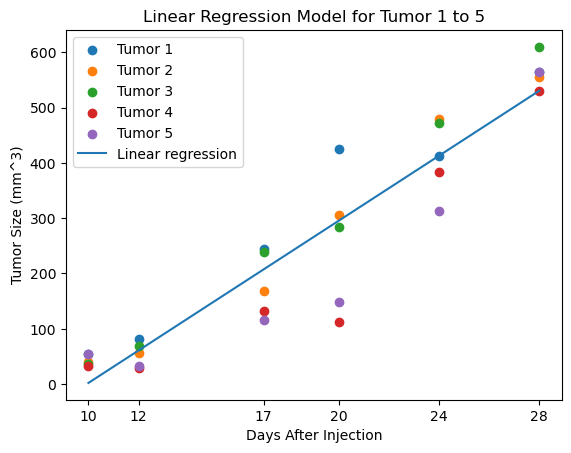

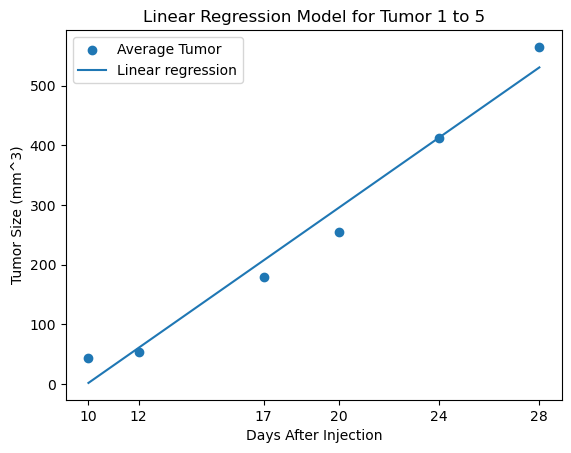

Linear Regression Equation: Y = -291.49 + 29.36*X
MSE: 2566.32
R^2: 0.93
MRSE: 0.20


In [19]:
# Plot each set of y1-values separately
for i in range(Y1.shape[1]):
    plt.scatter(X1, Y1[:, i], label=f'Tumor {i+1}')

# Plot the linear regression equation
x1_values = np.linspace(X1.min(), X1.max(), 100)
y1_values = average_intercept_1 + average_coef_1 * x1_values
plt.plot(x1_values, y1_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for Tumor 1 to 5')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


# Calculate the mean of Y2 across all tumors
average_Y1 = np.mean(Y1, axis=1)

# Plot the average of y-values
plt.scatter(X1, average_Y1, label='Average Tumor')

# Plot the linear regression equation
x1_values = np.linspace(X1.min(), X1.max(), 100)
y1_values = average_intercept_1 + average_coef_1 * x1_values
plt.plot(x1_values, y1_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for Tumor 1 to 5')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


print(f'Linear Regression Equation: Y = {average_intercept_1:.2f} + {average_coef_1:.2f}*X')
print(f'MSE: {mse1:.2f}')
print(f'R^2: {r2_1:.2f}')
print(f'MRSE: {mrse1:.2f}')


In [20]:
# In this chunk of code, we will again use go.Figure() to create a figure and add the standard deviation. In addition the linear regression line will also be added to the figure.
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_outlier_replaced['days_after_injection'],
    y=df_outlier_replaced.mean(axis=1),
    mode='lines',
    name='Mean',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
))
fig.add_trace(go.Scatter(
    x=df_outlier_replaced['days_after_injection'],
    y=df_outlier_replaced.mean(axis=1) + df_outlier_replaced.std(axis=1),
    mode='lines',
    name='Mean + Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the upper bound
fig.add_trace(go.Scatter(
    x=df_outlier_replaced['days_after_injection'],
    y=df_outlier_replaced.mean(axis=1) - df_outlier_replaced.std(axis=1),
    mode='lines',
    name='Mean - Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the lower bound

# Plot the linear regression equation
x_values = np.linspace(X1.min(), X1.max(), 100)
y_1values = average_intercept_1 + average_coef_1 * x_values # important, here you need to call the "model1"
fig.add_trace(go.Scatter(
    x=x_values,
    y=y_1values,
    mode='lines',
    name='Linear regression equation'
))

fig.update_layout(
    title='U251 Tumor Growth',
    title_x = 0.5,
    xaxis_title='Days Afer Injection',
    yaxis_title='Tumor Size (mm^3)',
    yaxis_range=[0, 1000] # this set the y-axis range to 0 to 1000
)
fig.update_xaxes(
    tickvals=[10, 12, 17, 20, 24, 28],
    ticktext=[10, 12, 17, 20, 24, 28]
)
fig.show()

print(f'Linear regression equation: y = {average_intercept_1:.2f} + {average_coef_1:.2f}*x')
print(f'R^2: {r2_1:.2f}')
print(f'MSE: {mse1:.2f}')
print(f'MRSE: {mrse1:.2f}')

Linear regression equation: y = -291.49 + 29.36*x
R^2: 0.93
MSE: 2566.32
MRSE: 0.20


### Now, we calculate after how many days the tumor will reach 300 mm^3, considering tumors 1 to 5 after removing outliers.

In [21]:
# the equation line is y = a1x1 + b1
# a1 is equal to the slope
# b1 is equal to the y-intercept
# y1 = 300 mm^3
# So, to calculate the equation line:
a1 = average_coef_1
print(f'The value of a is: {a1:.2f}')

b1 = average_intercept_1
print(f'The value of b is: {b1:.2f}')

y1 = 300

# So, replacing this values to the line equation:
x_grow1 = (300-b1)/a1
print(f'The tumors will reach 300 mm^3 in about: {x_grow1:.0f}', 'days')

The value of a is: 29.36
The value of b is: -291.49
The tumors will reach 300 mm^3 in about: 20 days


##### Now let's see how the individual tumors look like

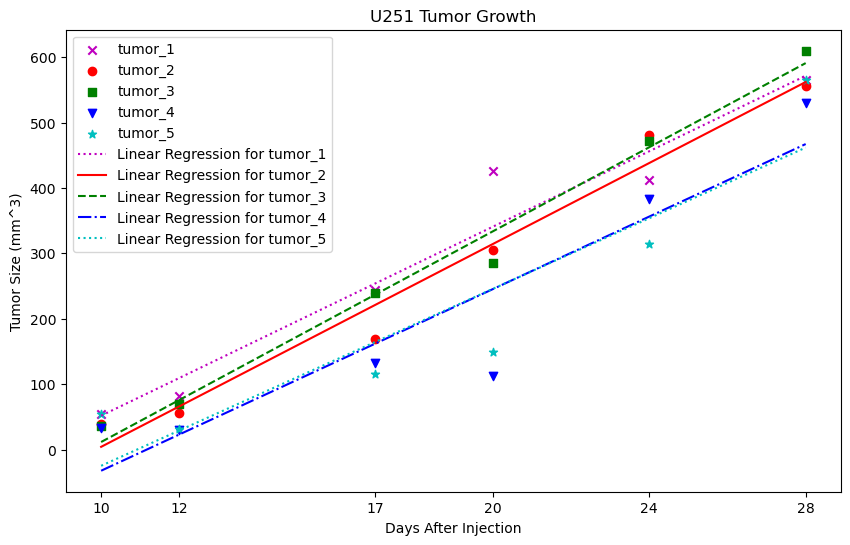

Linear regression equation: y1_1 = -236.87 + 28.87 * x
Linear regression equation: y2_1 = -305.63 + 30.98 * x
Linear regression equation: y3_1 = -310.23 + 32.18 * x
Linear regression equation: y4_1 = -309.76 + 27.74 * x
Linear regression equation: y5_1 = -294.97 + 27.02 * x


In [22]:
# Now, we need to create the X and y for the linear regression model. Since there are more than one tumor, each tumor will be assigned to a different y
X1 = df_outlier_replaced['days_after_injection']
y1_1= np.array(df_outlier_replaced['tumor_1'])
y2_1= np.array(df_outlier_replaced['tumor_2'])
y3_1= np.array(df_outlier_replaced['tumor_3'])
y4_1= np.array(df_outlier_replaced['tumor_4'])
y5_1= np.array(df_outlier_replaced['tumor_5'])

model_y1_1 = LinearRegression() # create the linear regression model for tumor_1
model_y1_1.fit(X1.values.reshape(-1, 1), y1_1) # fit the linear regression model for tumor_2

model_y2_1 = LinearRegression() # create the linear regression model for tumor_2
model_y2_1.fit(X1.values.reshape(-1, 1), y2_1) # fit the linear regression model for tumor_2

model_y3_1 = LinearRegression() # create the linear regression model for tumor_3
model_y3_1.fit(X1.values.reshape(-1, 1), y3_1) # fit the linear regression model for tumor_3

model_y4_1 = LinearRegression() # create the linear regression model for tumor_4
model_y4_1.fit(X1.values.reshape(-1, 1), y4_1) # fit the linear regression model for tumor_4

model_y5_1 = LinearRegression() # create the linear regression model for tumor_5
model_y5_1.fit(X1.values.reshape(-1, 1), y5_1) # fit the linear regression model for tumor_5

predictions_y1_1 = model_y1_1.predict(X1.values.reshape(-1, 1)) # predict the y2 values
predictions_y2_1 = model_y2_1.predict(X1.values.reshape(-1, 1)) # predict the y2 values
predictions_y3_1 = model_y3_1.predict(X1.values.reshape(-1, 1)) # predict the y3 values
predictions_y4_1 = model_y4_1.predict(X1.values.reshape(-1, 1)) # predict the y4 values
predictions_y5_1 = model_y5_1.predict(X1.values.reshape(-1, 1)) # predict the y5 values

# Finally, we plot the data points for each tumor, assigning a different color and marker
plt.figure(figsize=(10, 6))
plt.scatter(X1, y1_1, color='m', label='tumor_1', marker='x')
plt.scatter(X1, y2_1, color='r', label='tumor_2', marker='o')
plt.scatter(X1, y3_1, color='g', label='tumor_3', marker='s')
plt.scatter(X1, y4_1, color='b', label='tumor_4', marker='v')
plt.scatter(X1, y5_1, color='c', label='tumor_5', marker='*')

# Here we assign a different color and linestyle for each linear regression model derived from tumor_2 to tumor_5
plt.plot(X1,predictions_y1_1, color='m', linestyle='dotted', label='Linear Regression for tumor_1') 
plt.plot(X1, predictions_y2_1, color='r', linestyle='-', label='Linear Regression for tumor_2')
plt.plot(X1, predictions_y3_1, color='g', linestyle='--', label='Linear Regression for tumor_3')
plt.plot(X1, predictions_y4_1, color='b', linestyle='-.', label='Linear Regression for tumor_4')
plt.plot(X1, predictions_y5_1, color='c', linestyle=':', label='Linear Regression for tumor_5')

plt.xlabel('Days After Injection')
plt.ylabel('Tumor Size (mm^3)')
plt.title('U251 Tumor Growth')
plt.legend()
plt.xticks([10, 12, 17, 20, 24, 28])
plt.show()

print(f'Linear regression equation: y1_1 = {model_y1_1.intercept_:.2f} + {model_y1_1.coef_[0]:.2f} * x') # print the linear regression equation
print(f'Linear regression equation: y2_1 = {model_y2_1.intercept_:.2f} + {model_y2_1.coef_[0]:.2f} * x') # print the linear regression equation
print(f'Linear regression equation: y3_1 = {model_y3_1.intercept_:.2f} + {model_y3_1.coef_[0]:.2f} * x') # print the linear regression equation
print(f'Linear regression equation: y4_1 = {model_y4_1.intercept_:.2f} + {model_y4_1.coef_[0]:.2f} * x') # print the linear regression equation
print(f'Linear regression equation: y5_1 = {model_y5_1.intercept_:.2f} + {model_y5_1.coef_[0]:.2f} * x') # print the linear regression equation

## Finally, let's check how the tumor growth prediction analysis would look like if we haven't excluded any point

In [23]:
# First we print the main df
print(df_U251)

   days_after_injection  tumor_1  tumor_2  tumor_3  tumor_4  tumor_5
0                    10    50.40    39.38    35.50    32.32    16.46
1                    12    82.34    56.24    69.16    29.97    32.22
2                    17   243.80   168.57   239.31   132.60   116.17
3                    20   425.60   305.81   284.59   112.50   148.84
4                    24   744.67   480.20   472.38   383.82   313.60
5                    28  1211.48   555.13   609.75   529.83   334.61


In [24]:
X2 = df_U251['days_after_injection'].values.reshape(-1, 1) # To create the X2 array
y1_2= np.array(df_U251['tumor_1'])
y2_2= np.array(df_U251['tumor_2'])
y3_2= np.array(df_U251['tumor_3'])
y4_2= np.array(df_U251['tumor_4'])
y5_2= np.array(df_U251['tumor_5'])

Y2 = np.vstack([y1_2, y2_2, y3_2, y4_2, y5_2]).T # to stack the y arrays vertically into one single Y2

model2 = LinearRegression().fit(X2, Y2) # create the linear regression model

predictions2 = model2.predict(X2) # predict the y values
y_pred2 = model2.predict(X2) 
mse2 = mean_squared_error(Y2, y_pred2)
r2_2 = r2_score(Y2, y_pred2)
mrse2 = np.sqrt(mse2)/np.mean(Y2)

average_coef_2 = np.mean([model2.coef_]) # calculate the average coefficient of the linear regression equation. Omit [0][0] for gettin the right number
average_intercept_2 = np.mean([model2.intercept_]) # calculate the average intercept of the linear regression equation

print(f'Linear Regression Equation: Y = {average_intercept_2:.2f} + {average_coef_2:.2f}*X') # print the linear regression equation. This equation considers all tumors tumor based on the averages of intercept and coefficient.
print() # To print a space between the two print statements
print('Please see the predictions below:')
print(predictions2) # print the predicted y values

print() # To print a space between the two print statements
print('Please see the coefficients below:')
print(model2.coef_) # print the coefficients of the linear regression equation
print() # to print a space between the two print statements
print('Please see the intercept below:')
print(model2.intercept_) # print the intercept of the linear regression equation

print() # to print a space between the two print statements
print('Please see the MSE, R^2 and MRSE below:')
print(f'MSE: {mse2:.2f}', '''The Mean Square Error (MSE) measures the average squared difference between 
      the actual and predicted values in the model. Lower MSE values indicate better model performance''') # print the mean squared error of the linear regression model
print(f'R^2: {r2_2:.2f}', '''The R-squared value measures the proportion of the variance in the dependent 
      variable that is predictable from the independent variable. Higher R-squared vaules indicate better 
      model performance''') # print the R-squared value of the linear regression model
print(f'MRSE: {mrse2:.2f}', '''The Mean Relative Square Error (MRSE) is a variation of MSE that accounts 
      for the scale of the data by normalizing the squared error using the mean of the actual values. 
      It is useful when the scale of the target variable varies widely across samples. 
      Like MSE, lower MSRE values indicate better model performance''') # print the mean root squared error of the linear regression model

Linear Regression Equation: Y = -362.63 + 34.48*X

Please see the predictions below:
[[ -69.5860334     4.20033403   11.57665971  -32.31846903   -3.05581768]
 [  54.95538622   66.16613779   75.93862213   23.16979819   35.38476688]
 [ 366.30893528  221.08064718  236.84352818  161.89046625  131.48622825]
 [ 553.12106472  314.02935282  333.38647182  245.12286708  189.14710508]
 [ 802.20390397  437.96096033  462.11039666  356.09940153  266.02827418]
 [1051.28674322  561.89256785  590.8343215   467.07593598  342.90944328]]

Please see the coefficients below:
[[62.27070981]
 [30.98290188]
 [32.18098121]
 [27.74413361]
 [19.22029228]]

Please see the intercept below:
[-692.29313152 -305.62868476 -310.2331524  -309.75980515 -195.25874043]

Please see the MSE, R^2 and MRSE below:
MSE: 3893.60 The Mean Square Error (MSE) measures the average squared difference between 
      the actual and predicted values in the model. Lower MSE values indicate better model performance
R^2: 0.94 The R-squared v

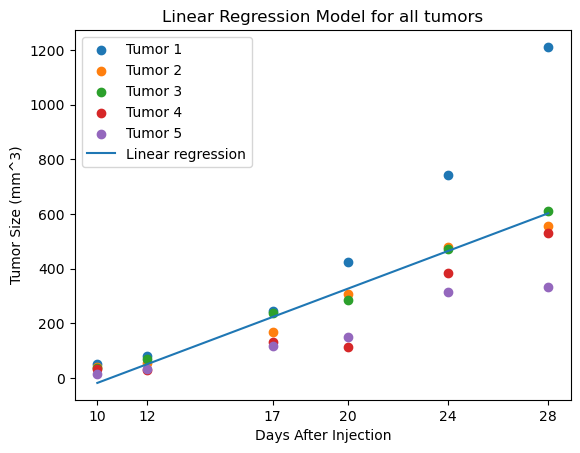

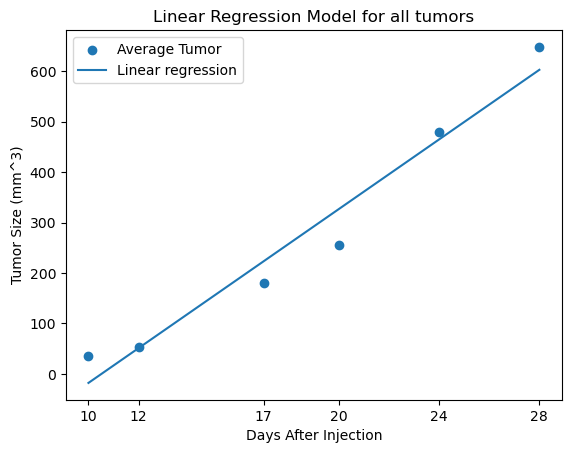

Linear Regression Equation: Y = -362.63 + 34.48*X
MSE: 3893.60
R^2: 0.94
MRSE: 0.23


In [25]:
# Plot each set of y-values separately
for i in range(Y2.shape[1]):
    plt.scatter(X2, Y2[:, i], label=f'Tumor {i+1}')

# Plot the linear regression equation
x2_values = np.linspace(X2.min(), X2.max(), 100)
y2_values = average_intercept_2 + average_coef_2 * x2_values
plt.plot(x2_values, y2_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for all tumors')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


# Calculate the mean of Y2 across all tumors
average_Y2 = np.mean(Y2, axis=1)

# Plot the average of y-values
plt.scatter(X2, average_Y2, label='Average Tumor')

# Plot the linear regression equation
x2_values = np.linspace(X2.min(), X2.max(), 100)
y2_values = average_intercept_2 + average_coef_2 * x2_values
plt.plot(x2_values, y2_values, label='Linear regression')

# Add a legend, labels, and title
plt.legend()
plt.ylabel('Tumor Size (mm^3)')
plt.xlabel('Days After Injection')
plt.title('Linear Regression Model for all tumors')
plt.xticks([10, 12, 17, 20, 24, 28])

# Show the plot
plt.show()


print(f'Linear Regression Equation: Y = {average_intercept_2:.2f} + {average_coef_2:.2f}*X')
print(f'MSE: {mse2:.2f}')
print(f'R^2: {r2_2:.2f}')
print(f'MRSE: {mrse2:.2f}')

In [26]:
# In this chunk of code, we will again use go.Figure() to create a figure and add the standard deviation. In addition the linear regression line will also be added to the figure.
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.mean(axis=1),
    mode='lines',
    name='Mean',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
))
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.mean(axis=1) + df_U251.std(axis=1),
    mode='lines',
    name='Mean + Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # this will create a trace for the upper bound
fig.add_trace(go.Scatter(
    x=df_U251['days_after_injection'],
    y=df_U251.mean(axis=1) - df_U251.std(axis=1),
    mode='lines',
    name='Mean - Std. Dev.',
    fill='tonexty',
    fillcolor='rgba(0,128,128,0.2)'
)) # This will create a trace for the lower bound

# Plot the linear regression equation
x2_values = np.linspace(X2.min(), X2.max(), 100)
y2_values = average_intercept_2 + average_coef_2 * x2_values
fig.add_trace(go.Scatter(
    x=x2_values,
    y=y2_values,
    mode='lines',
    name='Linear regression equation'
))

fig.update_layout(
    title='U251 Tumor Growth',
    title_x = 0.5,
    xaxis_title='Days Afer Injection',
    yaxis_title='Tumor Size (mm^3)',
    yaxis_range=[0, 1000] # This set the y-axis range to 0 to 1000
)
fig.update_xaxes(
    tickvals=[10, 12, 17, 20, 24, 28],
    ticktext=[10, 12, 17, 20, 24, 28]
)
fig.show()

print(f'Linear Regression Equation: Y = {average_intercept_2:.2f} + {average_coef_2:.2f}*X')
print(f'MSE: {mse2:.2f}')
print(f'R^2: {r2_2:.2f}')
print(f'MRSE: {mrse2:.2f}')

Linear Regression Equation: Y = -362.63 + 34.48*X
MSE: 3893.60
R^2: 0.94
MRSE: 0.23


### Now, we calculate how many days it takes for tumors to reach 300 mm^3 if no outlier is removed from the data.


In [27]:
# the equation line is y = a2x2 + b2
# a2 is equal to the slope
# b2 is equal to the y-intercept
# y2 = 300 mm^3
# So, to calculate the equation line:
a2 = average_coef_2
print(f'The value of a is: {a2:.2f}')

b2 = average_intercept_2
print(f'The value of b is: {b2:.2f}')

y2 = 300

# So, replacing this values to the line equation:
x_grow2 = (300-b2)/a2
print(f'The tumors will reach 300 mm^3 in about: {x_grow2:.0f}', 'days')

The value of a is: 34.48
The value of b is: -362.63
The tumors will reach 300 mm^3 in about: 19 days


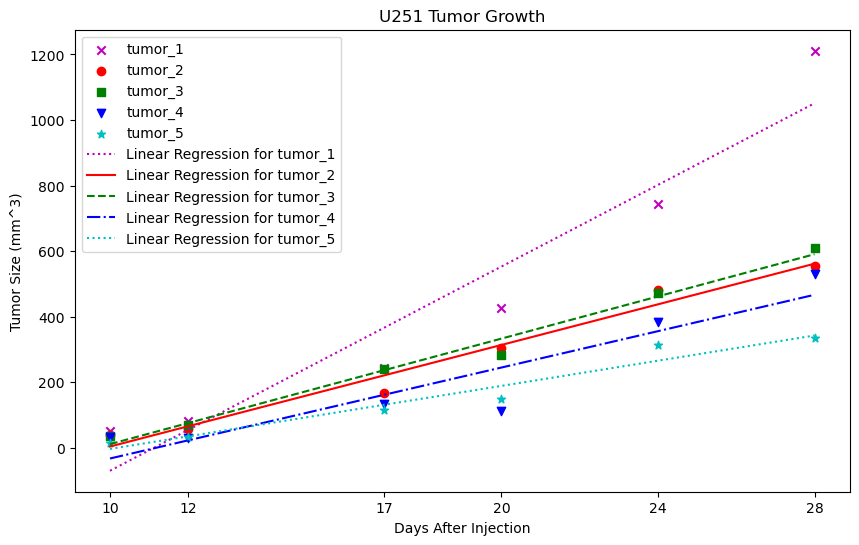

Linear regression equation: y1_2 = -692.29 + 62.27*X
Linear regression equation: y2_2 = -305.63 + 30.98*X
Linear regression equation: y3_2 = -310.23 + 32.18*X
Linear regression equation: y4_2 = -309.76 + 27.74*X
Linear regression equation: y5_2 = -195.26 + 19.22*X


In [28]:
# Now, we need to create the X and y for the linear regression model. Since there are more than one tumor, each tumor will be assigned to a different y
X2 = df_U251['days_after_injection']
y1_2= np.array(df_U251['tumor_1'])
y2_2= np.array(df_U251['tumor_2'])
y3_2= np.array(df_U251['tumor_3'])
y4_2= np.array(df_U251['tumor_4'])
y5_2= np.array(df_U251['tumor_5'])

model_y1_2 = LinearRegression() # create the linear regression model for tumor_1
model_y1_2.fit(X2.values.reshape(-1, 1), y1_2) # fit the linear regression model for tumor_2

model_y2_2 = LinearRegression() # create the linear regression model for tumor_2
model_y2_2.fit(X2.values.reshape(-1, 1), y2_2) # fit the linear regression model for tumor_2

model_y3_2 = LinearRegression() # create the linear regression model for tumor_3
model_y3_2.fit(X2.values.reshape(-1, 1), y3_2) # fit the linear regression model for tumor_3

model_y4_2 = LinearRegression() # create the linear regression model for tumor_4
model_y4_2.fit(X2.values.reshape(-1, 1), y4_2) # fit the linear regression model for tumor_4

model_y5_2 = LinearRegression() # create the linear regression model for tumor_5
model_y5_2.fit(X2.values.reshape(-1, 1), y5_2) # fit the linear regression model for tumor_5

predictions_y1_2 = model_y1_2.predict(X2.values.reshape(-1, 1)) # predict the y2 values
predictions_y2_2 = model_y2_2.predict(X2.values.reshape(-1, 1)) # predict the y2 values
predictions_y3_2 = model_y3_2.predict(X2.values.reshape(-1, 1)) # predict the y3 values
predictions_y4_2 = model_y4_2.predict(X2.values.reshape(-1, 1)) # predict the y4 values
predictions_y5_2 = model_y5_2.predict(X2.values.reshape(-1, 1)) # predict the y5 values

# Finally, we plot the data points for each tumor, assigning a different color and marker
plt.figure(figsize=(10, 6))
plt.scatter(X2, y1_2, color='m', label='tumor_1', marker='x')
plt.scatter(X2, y2_2, color='r', label='tumor_2', marker='o')
plt.scatter(X2, y3_2, color='g', label='tumor_3', marker='s')
plt.scatter(X2, y4_2, color='b', label='tumor_4', marker='v')
plt.scatter(X2, y5_2, color='c', label='tumor_5', marker='*')

# Here, we assign a different color and linestyle for each linear regression model derived from tumor_1 to tumor_5
plt.plot(X2, predictions_y1_2, color='m', linestyle='dotted', label='Linear Regression for tumor_1') 
plt.plot(X2, predictions_y2_2, color='r', linestyle='-', label='Linear Regression for tumor_2')
plt.plot(X2, predictions_y3_2, color='g', linestyle='--', label='Linear Regression for tumor_3')
plt.plot(X2, predictions_y4_2, color='b', linestyle='-.', label='Linear Regression for tumor_4')
plt.plot(X2, predictions_y5_2, color='c', linestyle=':', label='Linear Regression for tumor_5')

plt.xlabel('Days After Injection')
plt.ylabel('Tumor Size (mm^3)')
plt.title('U251 Tumor Growth')
plt.legend()
plt.xticks([10, 12, 17, 20, 24, 28])
plt.show()

print(f'Linear regression equation: y1_2 = {model_y1_2.intercept_:.2f} + {model_y1_2.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y2_2 = {model_y2_2.intercept_:.2f} + {model_y2_2.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y3_2 = {model_y3_2.intercept_:.2f} + {model_y3_2.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y4_2 = {model_y4_2.intercept_:.2f} + {model_y4_2.coef_[0]:.2f}*X') # print the linear regression equation
print(f'Linear regression equation: y5_2 = {model_y5_2.intercept_:.2f} + {model_y5_2.coef_[0]:.2f}*X') # print the linear regression equation

In [29]:
# Create a list with entries for the conclusion
final_data = {'Regression Model': ['Removing tumor_1', 'Only removing outliers', 'Not excluding outliers'],
              'Days to reach 300 mm^3': [x_grow, x_grow1, x_grow2],
              'R squared': [r2, r2_1, r2_2],
              'MSE': [mse, mse1, mse2],
              'MRSE': [mrse, mrse1, mrse2]}

# Create a DataFrame
df_final_data = pd.DataFrame(final_data)

# Print the output
print(df_final_data)

         Regression Model  Days to reach 300 mm^3  R squared          MSE  \
0        Removing tumor_1               20.555332   0.929180  2575.289588   
1  Only removing outliers               20.146344   0.927347  2566.324646   
2  Not excluding outliers               19.218053   0.941437  3893.600923   

       MRSE  
0  0.212582  
1  0.201296  
2  0.226705  


### Conclusions:
All three linear regression models fit the points. By visual inspection, we observe a bigger range for the set where outliers weren't excluded. That is also confirmed by MSE analysis, which retrieved the highest number for this 'Not excluding outliers', besides R^2 performing well. Now, comparing the data by excluding tumor_1 and only excluding outliers from the dataset resulted in the same number of days to tumor reach 300 mm^3. Furthermore, both also had similar R^2 numbers. However, the MSE and MRSE analyses resulted in the lowest number, in both cases, for 'Only removing outliers'; In light of these findings, we recommend 'Only removing outliers' as the most effective approach for linear regression in this context.

#### Author: Cristian A. W. Villas Boas, Ph.D.